In [1]:
#this file used to test the model with only weights
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [2]:
classes = ['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
             'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank','Tee', 'Top']

In [3]:
vgg16 = keras.applications.vgg16
conv_model = vgg16.VGG16(weights='imagenet', include_top=False)
# conv_model.summary()

In [4]:
conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [5]:
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
# final softmax layer with 15 categories
predictions = keras.layers.Dense(15, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
# full_model.summary()

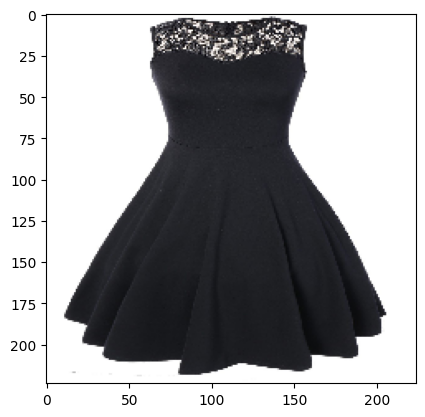

In [20]:
import keras.utils as image
from keras.applications.vgg16 import preprocess_input

img_path = r'C:\Users\Yavuz\Documents\Projects\disertation\test\mytest\2.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)

In [21]:
def get_class_string_from_index(index):
  for class_index, class_string in enumerate(classes):
    if class_index == index:
      return class_string
      
# Load the model weights
full_model.load_weights(r"C:\Users\Yavuz\Documents\Projects\disertation\test\mytest\model_1.h5")

# Make a prediction
prediction = full_model.predict(x)  
predicted_index = np.argmax(prediction)


# Print the prediction
# print(prediction)
# print(predicted_index)
print("Predicted label: " + get_class_string_from_index(predicted_index))


1/1 [==============================] - 0s 140ms/step
Predicted label: Tank
